# Employee Attrition
Employee attrition refers to an employees’ voluntary or involuntary departure from an organization. The cost of employee attrition can be huge since replacing human resources with desired skill sets in a limited time is a difficult and costly task.

Knowing in advance the likelihood that employees are going to leave an organization can help organizations make an effort to boost employee retention and proactively hire replacements in time.

Machine learning systems have been developed to flag potential employee attrition, as we’ll demonstrate in this tutorial.

This tutorial will walk you through how to develop a machine learning employee attrition prediction model with the Python [scikit-learn library](https://scikit-learn.org/stable/).

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset
We will use the IBM HR Analytics Employee Attrition Dataset from kaggle to train our machine learning model.

[www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

![](./ibm.jpg)

In [17]:
# Dataset
attrition_dataset = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print("Dataset rows and columns:", attrition_dataset.shape)
attrition_dataset.head()

Dataset rows and columns: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis
35 columns is quite a bit of data so lets spend a few minutes exploring our dataset. 

The script below finds the percentage of missing values in each column. 

The output shows that we don’t have missing values in any column.

In [18]:
attrition_dataset.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

The Attrition column from the dataset contains “Yes” and “No” values for employee attrition. 

Let’s plot a pie chart showing the data distribution for the “Attrition” column.

<AxesSubplot:ylabel='Attrition'>

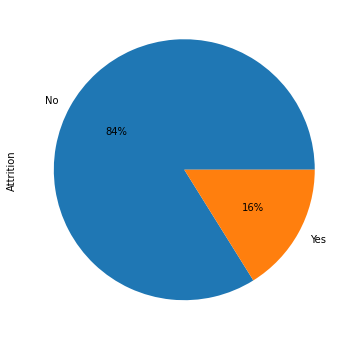

In [19]:
attrition_dataset.Attrition.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8, 6))

From the output below, you can see that the employee attrition rate in our dataset is 16%, which also means that our dataset is highly imbalanced.

Let’s see how the employee attrition ratio varies with the marital status of an employee.

<AxesSubplot:xlabel='MaritalStatus'>

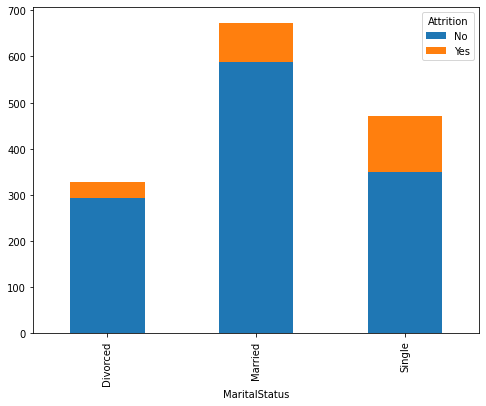

In [20]:
attrition_dataset.groupby(['MaritalStatus', 'Attrition']).size().unstack().plot(kind='bar',stacked=True,figsize=(8, 6))

The following script shows the employee attrition rates among different age groups.

<AxesSubplot:xlabel='Age'>

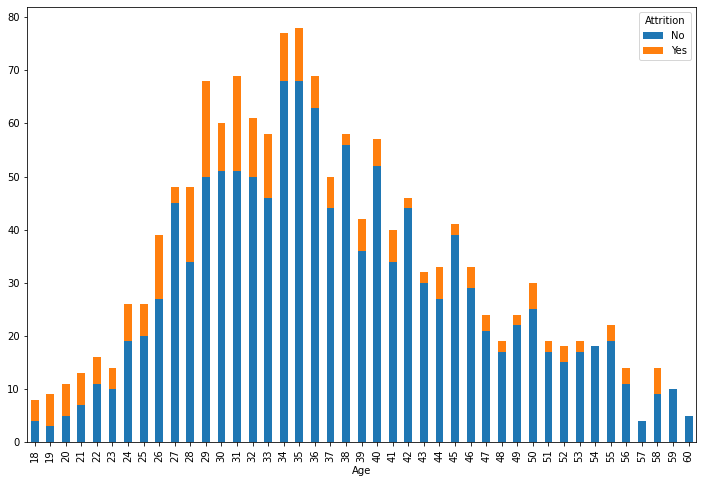

In [21]:
attrition_dataset.groupby(['Age', 'Attrition']).size().unstack().plot(kind='bar',stacked=True,figsize=(12, 8))

The output shows that, in our dataset, employee attrition rates are higher among employees aged less than 35. The attrition rates are zero among the employees aged 57, 59 and 60.

# Data Preprocessing
Before you can train a machine learning model on a dataset, you need to do some preprocessing. 

The first step is to divide the dataset into a features and a labels set. 

In our dataset the Attrition column contains labels, while the feature set consists of the rest of the columns. 

The following script divides the dataset into features and labels sets.

In [ ]:
feature_set =  attrition_dataset.drop(['Attrition'], axis=1)
labels = attrition_dataset.filter(['Attrition'], axis=1)

Machine learning algorithms work with numbers, but our feature set contains some non-numeric columns, as you can see from the output of the following script.

In [ ]:
feature_set.dtypes

We need to convert the non-numeric columns in our dataset to numeric columns.

The following script separates categorical features from numeric features in our dataset.

In [ ]:
cat_col_names = ['BusinessTravel',
                       'Department',
                       'EducationField',
                       'Gender',
                       'JobRole',
                       'MaritalStatus',
                       'Over18',
                       'OverTime'
                      ]

num_cols = feature_set.drop(cat_col_names, axis=1)
cat_columns = feature_set.filter(cat_col_names, axis = 1)

You can use the [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) approach to convert categorical features to numeric features. 

The following script uses the Pandas get_dummies() method to convert categorical features in our dataset to one-hot encoded numeric features. 

The output shows the total number of one-hot encoded columns.

In [22]:
cat_columns_one_hot = pd.get_dummies(cat_columns, drop_first=True)
cat_columns_one_hot.shape

(1470, 21)

Finally, you can concatenate the default numeric features with the one-hot encoded numeric features to form the final feature set.

In [23]:
X = pd.concat([num_cols,cat_columns_one_hot], axis=1)
X.shape

(1470, 47)

Similarly, we can convert the simple “Yes” and “No” values from our labels set to binary 1 and 0 values, respectively, using the following script:

In [24]:
y =  labels['Attrition'].map({'Yes': 1, 'No': 0})
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

# Model Training and Predictions
We’ll divide our data into training and test sets. 

The model will be trained using the training set while the performance of the trained model will be evaluated on the test set. 

The following script divides the data into 80% training and 20% test sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

Our machine learning model will be trained using the Random Forest Classifier. 

To do so, we will use the RandomForestClassifier class from the scikit-kearn library.

The following script trains the model using the **fit()** method on the training set and it then makes predictions on the test set using the **predict()** method.

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 40, random_state = 42)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

Ready to evaluate the performance of our trained model on the test set. 

The output shows that the model achieves an accuracy of 87.07% on the test set.

In [26]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test,pred ))
print(accuracy_score(y_test, pred ))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294

0.8707482993197279


As a last step, we want to see what the most important features an organizations must consider to avoid employee attrition. 

To do so, you can use the **feature_importances_** attribute from the trained random forest classifier.

<AxesSubplot:>

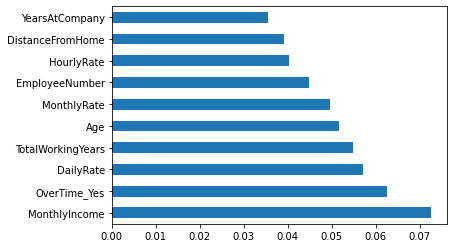

In [27]:
important_features = pd.Series(rf_clf.feature_importances_, index=X.columns)
important_features.nlargest(10).plot(kind='barh')

The above output shows that monthly income and overtime are the most important reasons behind employee attrition.